#Data Science in Public Governance - Assignment 2
Group 9: Ola Zając (2872897) and Chenfei Li (8749396)

December 13, 2024

## Data preparation

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Loading and examining the data
url = 'https://drive.google.com/uc?export=download&id=1Xh8IARmqdrmuC_flcLVRjj6VqSyui6Aj'

# Read the CSV into a DataFrame
df = pd.read_csv(url, header=0, sep=';')

# Display the first few rows and some information about the dataframe
display(df.head())

print("Dataset overview:")
print(df.info())

print("\nAll columns:", df.columns.tolist())

,ID,Characteristics,Margins,Periods,Smokers_1,FormerSmokers_2,NeverSmokers_3,DailySmokersInThePopulation_4,DailySmokersAmongSmokers_5,HeavySmokersInThePopulation_6,...,SugaryDrinksGlassesPerWeek_92,High_93,Middle_94,Low_95,AverageNutritionScore_96,InfluenzaInoculation16YearsOrOlder_97,CoronaVaccination12YearsOrOlder_98,InformalCareGiver_99,HoursOfInformalCarePerWeek_100,StrainedInformalCareGivers_101
0,0,T009002,MW00000,2014JJ00,24.2,29.8,46.1,18.4,76.1,4.1,...,.,.,.,.,.,26.1,.,.,.,.
1,1,T009002,MW00000,2015JJ00,24.6,28.8,46.6,18.2,74.0,3.8,...,.,.,.,.,.,24.4,.,14.9,11.3,14.7
2,2,T009002,MW00000,2016JJ00,22.7,29.8,47.5,17.3,76.3,3.7,...,.,.,.,.,.,22.8,.,13.9,11.2,14.6
3,3,T009002,MW00000,2017JJ00,21.7,30.1,48.2,16.1,74.3,3.3,...,.,.,.,.,.,23.1,.,14.9,11.0,12.4
4,4,T009002,MW00000,2018JJ00,21.0,30.7,48.3,14.9,71.1,3.1,...,.,.,.,.,.,22.8,.,14.5,11.1,13.9


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Columns: 105 entries, ID to StrainedInformalCareGivers_101
dtypes: int64(1), object(104)
memory usage: 1.6+ MB
None

All columns: ['ID', 'Characteristics', 'Margins', 'Periods', 'Smokers_1', 'FormerSmokers_2', 'NeverSmokers_3', 'DailySmokersInThePopulation_4', 'DailySmokersAmongSmokers_5', 'HeavySmokersInThePopulation_6', 'HeavySmokersAmongSmokers_7', 'CigaretteSmokers_8', 'CigarettesPerDayPerSmoker_9', 'SmokingYearsCurrentSmokers_10', 'QuittingAttemptsInThePast12Months_11', 'SmokingYearsFormerSmokers_12', 'QuittingYearsFormerSmokers_13', 'ECigarette12YearsOrOlder_14', 'AlmostNever_15', 'NotDaily_16', 'DailyLessThanOneHour_17', 'DailyOneHourOrMore_18', 'Drinkers_19', 'FormerDrinkers_20', 'NeverDrinkers_21', 'HeavyDrinkersInThePopulation_22', 'HeavyDrinkersAmongDrinkers_23', 'ExcessiveDrinkersInThePopulation_24', 'ExcessiveDrinkersAmongDrinkers_25', 'NumberOfAlcoholicBeveragesPerDay_26', 'UpTo1Gl

We successfully loaded the dataset. We can see that in its raw form it consists of 105 columns and 1950 rows. We print out the list of all column names.

Next, we select only the columns relevant for our analysis based on variable descriptions provided in the [metadata document](https://drive.google.com/uc?export=download&id=10LwU75DFgZoBeCXu_C8Wp_5UUQSO2bzJ). A list of selected variables with their description can be found in the Appendix A of our paper.


In [ ]:
# Variable selection
columns = ['Characteristics', 'Periods', 'Smokers_1', 'DailySmokersInThePopulation_4', 'NeverSmokers_3', 'FormerSmokers_2', 'ECigarette12YearsOrOlder_14', 'Margins']
df_dirty = df[columns]
display(df_dirty)

,Characteristics,Periods,Smokers_1,DailySmokersInThePopulation_4,NeverSmokers_3,FormerSmokers_2,ECigarette12YearsOrOlder_14,Margins
0,T009002,2014JJ00,24.2,18.4,46.1,29.8,.,MW00000
1,T009002,2015JJ00,24.6,18.2,46.6,28.8,.,MW00000
2,T009002,2016JJ00,22.7,17.3,47.5,29.8,.,MW00000
3,T009002,2017JJ00,21.7,16.1,48.2,30.1,.,MW00000
4,T009002,2018JJ00,21.0,14.9,48.3,30.7,.,MW00000
...,...,...,...,...,...,...,...,...
1945,2021810,2019JJ00,13.9,8.3,56.2,35.5,1.7,MBG0095
1946,2021810,2020JJ00,13.8,9.0,56.4,35.9,0.9,MBG0095
1947,2021810,2021JJ00,14.8,9.3,58.7,32.6,1.2,MBG0095
1948,2021810,2022JJ00,12.1,6.4,60.2,33.0,2.8,MBG0095


In [ ]:
# Preparing the variables

def clean_smoking_data(df):
  """
  Cleans the smoking data by replacing missing values, filtering relevant rows, mapping age groups,
  standardizing year format, converting numeric columns, renaming for clarity, and resetting the index.
  """
  # Replace . in cells (potential missing values) with NaN
  df = df.replace(' ', np.nan) # replace any space in any column with np.nan
  df = df.replace('       .', np.nan) # replace any space in any column with np.nan

  df = df[df['Margins'] == 'MW00000']
  df = df.drop(columns=['Margins'])

  # Map 'Characteristics' codes to more understandable values
  characteristics_mapping = {
      '80001  ': 'A0-11', #Age: 0 to 11 years
      '52020  ': 'A12-17', #Age: 12 to 17 years
      '20300  ': 'A18+' #Age: 18 years or older
  }

  # Include only rows with the specified codes
  df = df[df['Characteristics'].isin(characteristics_mapping.keys())]

  # Recode the values in the 'Characteristics' column
  df['Characteristics'] = df['Characteristics'].map(characteristics_mapping)

  # Correct the Period formats
  df['Periods'] = pd.to_datetime(df['Periods'].str[:4], format='%Y')

  # List of columns to convert to float
  numeric_columns = [
      'Smokers_1',
      'DailySmokersInThePopulation_4',
      'NeverSmokers_3',
      'FormerSmokers_2',
      'ECigarette12YearsOrOlder_14'
  ]

  # Convert the specified columns to float
  df[numeric_columns] = df[numeric_columns].astype(float)


  df= df.rename(columns={
    'Characteristics': 'AgeGroup',
    'Periods': 'Year',
    'Smokers_1': 'Smokers',
    'DailySmokersInThePopulation_4': 'DailySmokers',
    'NeverSmokers_3': 'NonSmokers',
    'FormerSmokers_2': 'FormerSmokers',
    'ECigarette12YearsOrOlder_14': 'ECigarette'})

  df = df.reset_index(drop=True)


  return df

df_clean = clean_smoking_data(df_dirty)
display(df_clean.tail())
print(df_clean.dtypes)
print(df_clean.shape)

,AgeGroup,Year,Smokers,DailySmokers,NonSmokers,FormerSmokers,ECigarette
25,A18+,2019-01-01,21.7,15.9,45.7,32.6,1.6
26,A18+,2020-01-01,20.2,14.9,46.1,33.7,1.1
27,A18+,2021-01-01,20.6,15.2,46.9,32.6,1.4
28,A18+,2022-01-01,18.9,13.1,48.4,32.8,2.8
29,A18+,2023-01-01,19.0,13.5,48.2,32.8,3.9


AgeGroup                 object
Year             datetime64[ns]
Smokers                 float64
DailySmokers            float64
NonSmokers              float64
FormerSmokers           float64
ECigarette              float64
dtype: object
(30, 7)


We can see that after cleaning the dataset consists of 7 columns and 30 rows - 10 years (2014-2023) per each of 3 age groups (below 11, between 12 and 17, and above 18 years old). The column names are understandable, and all values have a correct format. Next we examine whether there is any missing data.

In [ ]:
# Examining missing data
print("Missing Data Summary:")
print(df_clean.isnull().sum())

print("Missing Data Summary per AgeGroup:")
missing_data_summary = df_clean.groupby('AgeGroup').apply(lambda group: group.isnull().sum())
print(missing_data_summary)

Missing Data Summary:
AgeGroup          0
Year              0
Smokers          10
DailySmokers     10
NonSmokers       10
FormerSmokers    10
ECigarette       20
dtype: int64
Missing Data Summary per AgeGroup:
          AgeGroup  Year  Smokers  DailySmokers  NonSmokers  FormerSmokers  \
AgeGroup                                                                     
A0-11            0     0       10            10          10             10   
A12-17           0     0        0             0           0              0   
A18+             0     0        0             0           0              0   

          ECigarette  
AgeGroup              
A0-11             10  
A12-17             5  
A18+               5  


<ipython-input-6-876773632a97>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_summary = df_clean.groupby('AgeGroup').apply(lambda group: group.isnull().sum())


We can see that the Age Group 0-11 years old accounts for all missing data in variables 'Smokers', 'DailySmokers', 'NonSmokers', and 'FormerSmokers' so we will not be using it for the analysis.

The missing data for the ECigarette variable comes from before the year 2019 so we will not be making comparisons for before and after the policy implementation, only looking the the most recent trend.

There is no other missing data that needs to be dealt with - likely the dataset was already cleaned for missingness, yet we do not know what method was used and thus we have to consider that the method used might have introduced some bias.

In [ ]:
# Drop rows where AgeGroup is 'A0-11'
df_smokers = df_clean[df_clean['AgeGroup'] != 'A0-11']
df_smokers = df_smokers.reset_index(drop=True)

print("Missing Data Summary:")
print(df_smokers.isnull().sum())

display(df_smokers.head())
print(df_smokers.shape)

Missing Data Summary:
AgeGroup          0
Year              0
Smokers           0
DailySmokers      0
NonSmokers        0
FormerSmokers     0
ECigarette       10
dtype: int64


,AgeGroup,Year,Smokers,DailySmokers,NonSmokers,FormerSmokers,ECigarette
0,A12-17,2014-01-01,7.8,4.5,87.6,4.7,NaN
1,A12-17,2015-01-01,6.9,4.0,90.5,2.6,NaN
2,A12-17,2016-01-01,7.5,3.7,89.9,2.6,NaN
3,A12-17,2017-01-01,6.2,3.8,91.4,2.4,NaN
4,A12-17,2018-01-01,5.8,3.1,92.7,1.5,NaN


(20, 7)


Our final dataset contains 7 columns and 20 rows. After cleaning and preparing the dataset we are ready to see initial visualisations - they can help us determine if any additional preprocessing might be necessary.

In [ ]:
display(df_smokers)

,AgeGroup,Year,Smokers,DailySmokers,NonSmokers,FormerSmokers,ECigarette
0,A12-17,2014-01-01,7.8,4.5,87.6,4.7,NaN
1,A12-17,2015-01-01,6.9,4.0,90.5,2.6,NaN
2,A12-17,2016-01-01,7.5,3.7,89.9,2.6,NaN
3,A12-17,2017-01-01,6.2,3.8,91.4,2.4,NaN
4,A12-17,2018-01-01,5.8,3.1,92.7,1.5,NaN
5,A12-17,2019-01-01,5.6,2.8,92.5,1.9,0.4
6,A12-17,2020-01-01,4.2,2.1,95.1,0.7,0.4
7,A12-17,2021-01-01,6.4,2.5,92.8,0.8,1.3
8,A12-17,2022-01-01,6.6,2.3,91.8,1.6,3.7
9,A12-17,2023-01-01,7.2,2.2,91.6,1.2,6.1


We create two simple initial visualisations to check the data and preprocessing.

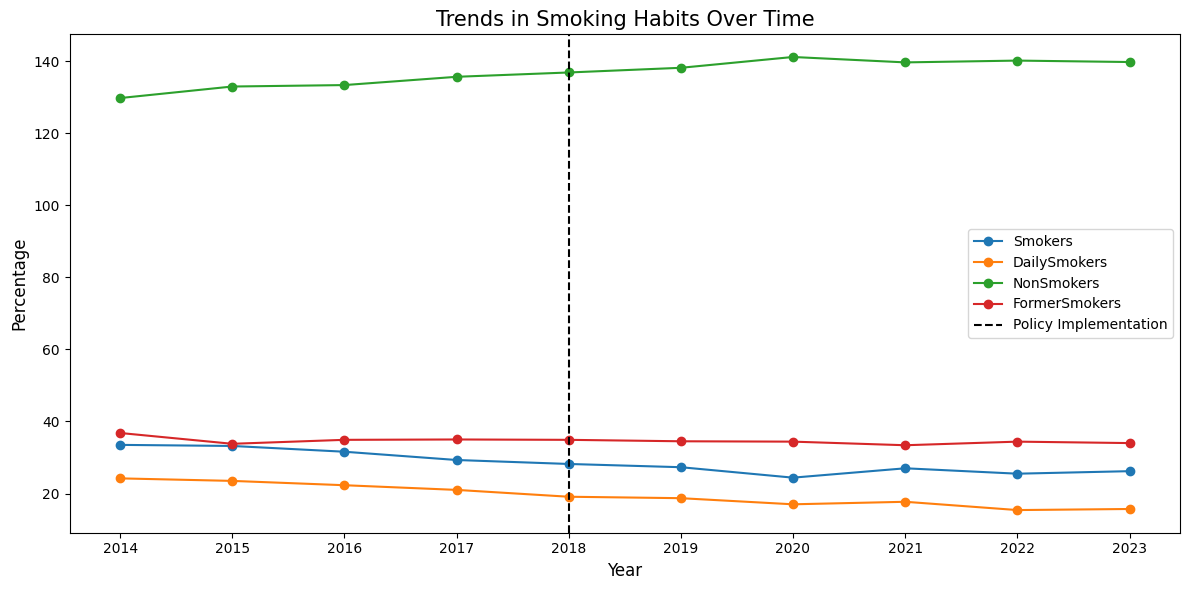

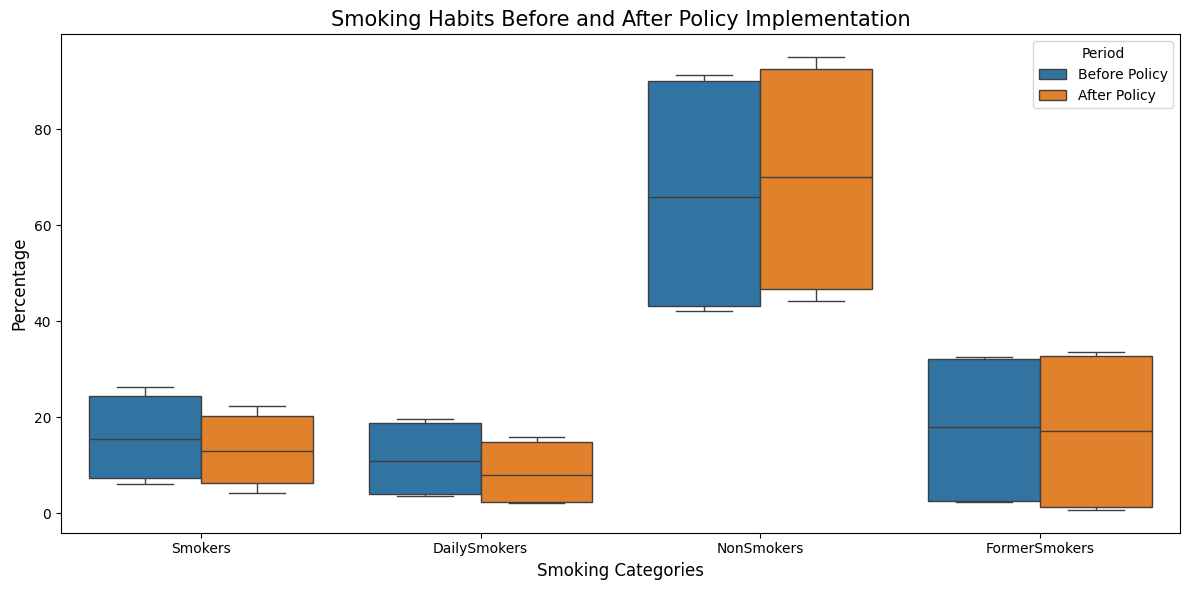

In [ ]:
# Time series of smoking habits

# Group by year and sum across age groups
aggregated = df_smokers.groupby('Year')[['Smokers', 'DailySmokers', 'NonSmokers', 'FormerSmokers']].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
for column in aggregated.columns:
    plt.plot(aggregated.index, aggregated[column], label=column, marker='o')

plt.axvline(x=pd.Timestamp('2018-01-01'), color='black', linestyle='--', label='Policy Implementation')

# Add labels, legend, and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Trends in Smoking Habits Over Time', fontsize=15)
plt.tight_layout()
plt.legend()
plt.show()


# Before-after policy boxplots of smoking habits

# Create a `Period` column in the dataframe
df_smokers['Period'] = np.where(df_smokers['Year'] < '2018-01-01', 'Before Policy', 'After Policy')

# Melt the dataframe
melted_smokers = df_smokers.melt(id_vars=['Period'],
                    value_vars=['Smokers', 'DailySmokers', 'NonSmokers', 'FormerSmokers'],
                    var_name='Category',
                    value_name='Percentage')

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_smokers, x='Category', y='Percentage', hue='Period')
plt.title('Smoking Habits Before and After Policy Implementation', fontsize=15)
plt.xlabel('Smoking Categories', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Period')
plt.xticks()
plt.tight_layout()
plt.show()

Evrything here looks good, there are no outliers or irregularities in the data. We can move on to analysis.

## Data Analysis: 1a. Changes in Smoking Behavior and Habits Among Dutch Adults

We examine the dataset and create a visualisation for our first question: Were the smoking levels registered in 2020 below 20%, fulfilling the intermediate goal of the policy?

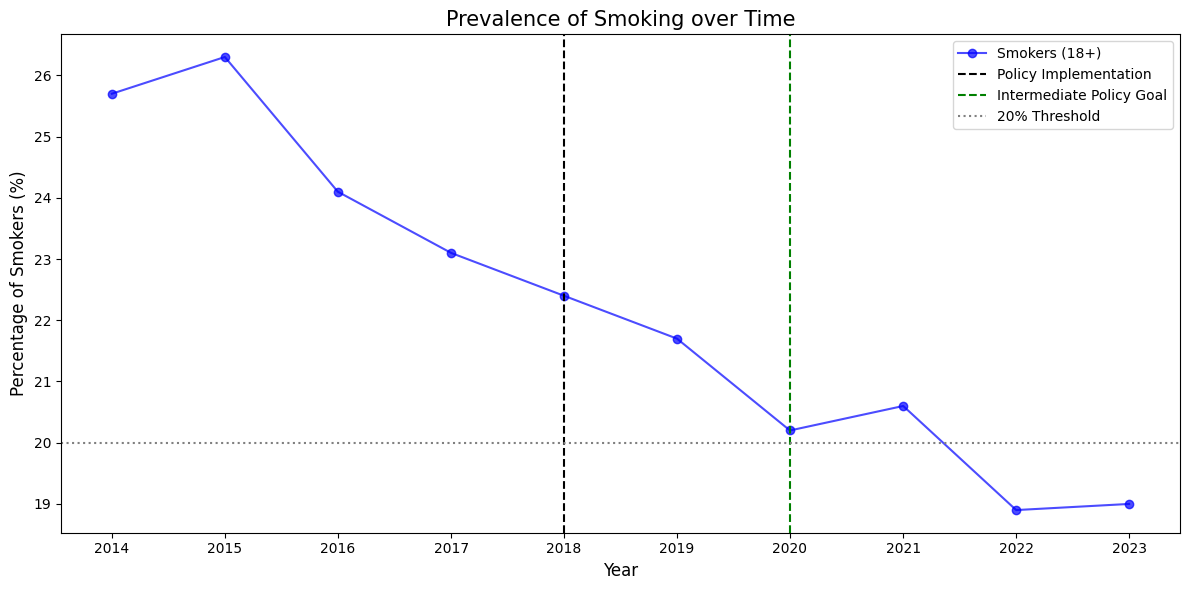

The percentage of adult smokers in 2020 was: 20.2%


In [ ]:
# Time Series of Smokers

df_12_17 = df_smokers[df_smokers['AgeGroup'] == 'A12-17']
df_18_plus = df_smokers[df_smokers['AgeGroup'] == 'A18+']

plt.figure(figsize=(12, 6))
plt.title('Prevalence of Smoking over Time', fontsize=15)

plt.plot(df_18_plus['Year'], df_18_plus['Smokers'], label='Smokers (18+)', color='blue', alpha=0.7, marker='o')

# Add veritical lines for the important dates
plt.axvline(x=pd.Timestamp('2018-01-01'), color='black', linestyle='--', label='Policy Implementation')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='Intermediate Policy Goal')

# Add a horizontal line at 20%
plt.axhline(y=20, color='gray', linestyle=':', label='20% Threshold')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Smokers (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Print out the % of smokers in 2020:
adult_smokers_2020 = df_smokers[(df_smokers['Year'] == '2020-01-01') & (df_smokers['AgeGroup'] == 'A18+')]['Smokers']
print(f"The percentage of adult smokers in 2020 was: {adult_smokers_2020.iloc[0]}%")

## Data Analysis: 1b. Reduction in Daily Smoking


We create visualisations and perform statistical testing to evaluate our second question: Has the number of daily smokers among adults (18+) decreased since the policy's implementation?

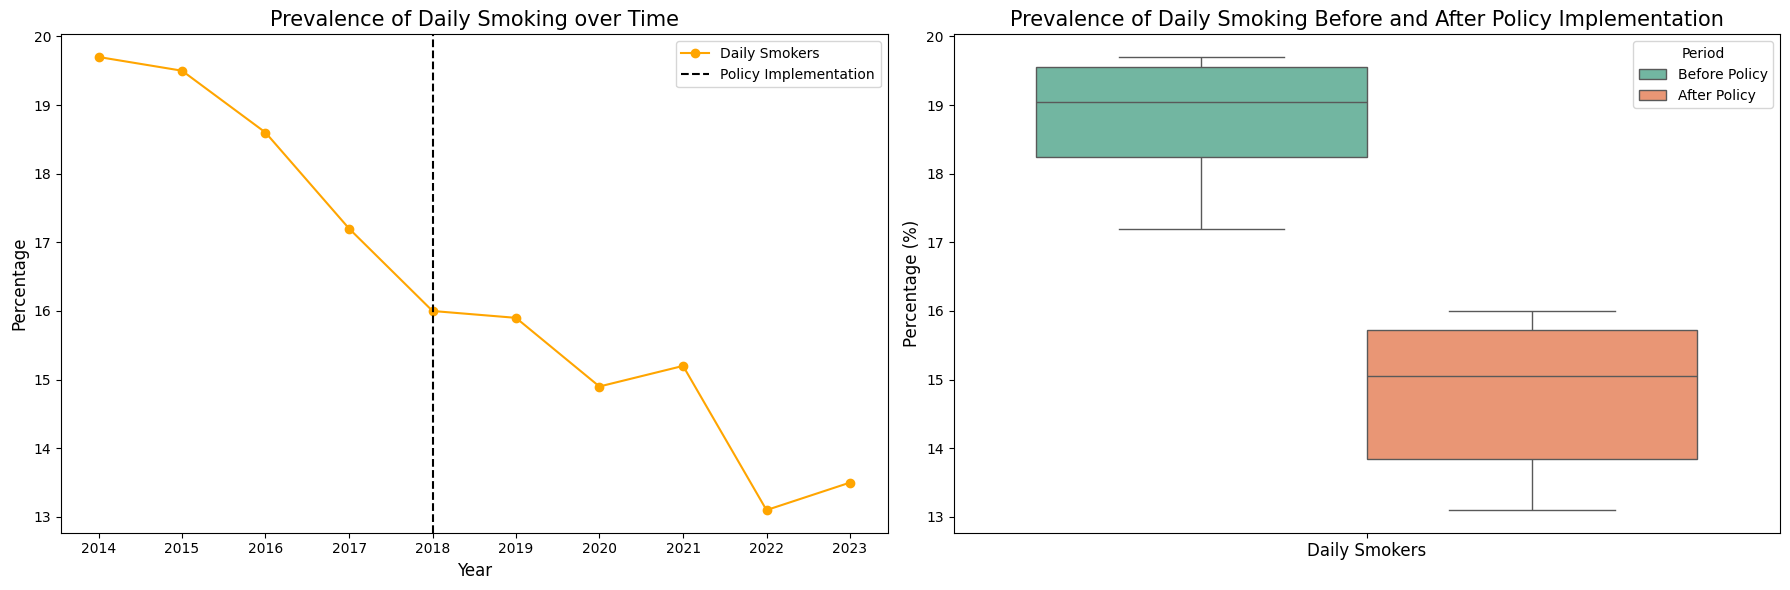

In [ ]:
# Create a visualisation for daily smokers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Time series of prevalence of daily smokers
axes[0].plot(df_18_plus['Year'], df_18_plus['DailySmokers'], marker='o', label='Daily Smokers', color='orange')
axes[0].axvline(x=pd.Timestamp('2018-01-01'), color='black', linestyle='--', label='Policy Implementation') # Add a vertical line for policy implementation
axes[0].set_title('Prevalence of Daily Smoking over Time', fontsize=15)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].legend()

# Before-After Boxplot of Adult Daily Smokers
melted_adults = df_18_plus.melt(
    id_vars=['AgeGroup', 'Period'],
    value_vars=['DailySmokers', 'FormerSmokers'],
    var_name='Category',
    value_name='Percentage'
)
adult_daily_smokers = melted_adults[melted_adults['Category'] == 'DailySmokers']

sns.boxplot(x='Category', y='Percentage', hue='Period', data=adult_daily_smokers, palette='Set2', ax=axes[1])
axes[1].set_title('Prevalence of Daily Smoking Before and After Policy Implementation', fontsize=15)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('')  # Remove x-axis label
axes[1].set_xticks([0])
axes[1].set_xticklabels(['Daily Smokers'], fontsize=12)


plt.tight_layout()
plt.show()

By visual exploration we can tell that the number of daily smokers has been on a downward slope since the beginning of the recorded period and appear to have lowered since the implementation of the policy. To make sure this change is significant we perform statistical testing.

In [ ]:
def test_assumptions(df, smokers_types):
  """
  Performs statistical tests to check the assumptions of normality and equal variances
  for different smoking categories before and after a policy implementation in 2018.
  """
  before = df[df['Year'] < '2018-01-01'][smokers_types]
  after = df[df['Year'] >= '2018-01-01'][smokers_types]

  # Normality Test
  normality_before = stats.shapiro(before)
  normality_after = stats.shapiro(after)

  # Equal Variances Test
  equal_var_test = stats.levene(before, after)

  return {
        'smokers_types': smokers_types,
        'normality_before_p': normality_before.pvalue,
        'normality_after_p': normality_after.pvalue,
        'equal_var_p': equal_var_test.pvalue
    }

# Perform the tests for each smoker category
smokers = ['Smokers', 'DailySmokers', 'NonSmokers', 'FormerSmokers']
assumptions_results = [test_assumptions(df_18_plus, smokers_types) for smokers_types in smokers]
assumptions_df = pd.DataFrame(assumptions_results)

# Display results for daily smokers
assumptions_daily = assumptions_df[assumptions_df['smokers_types'] == 'DailySmokers']
print(assumptions_daily)

  smokers_types  normality_before_p  normality_after_p  equal_var_p
1  DailySmokers            0.415791           0.316875     0.859818


The data meets the assumptions of normality and equal variances. We use parametric tests.

In [ ]:
# Statistical (parametric) Analysis
def analyze_policy_impact(df, smokers_types):
  """
  Analyzes the impact of a policy change on smoking metrics using t-tests, percent change, and effect size (Cohen's d).
  """
  before = df[df['Year'] < '2018-01-01'][smokers_types]
  after = df[df['Year'] >= '2018-01-01'][smokers_types]

  # t-test
  t_statistic, p_value = stats.ttest_ind(before, after)

  # Effect Size (Cohen's d)
  mean_before = before.mean()
  mean_after = after.mean()
  pooled_std = np.sqrt(((before.std() ** 2) + (after.std() ** 2)) / 2)
  cohen_d = (mean_after - mean_before) / pooled_std

  return {
        'smokers_types': smokers_types,
        'mean_before': before.mean(),
        'mean_after': after.mean(),
        'percent_change': ((after.mean() - before.mean()) / before.mean()) * 100,
        't_statistic': t_statistic,
        'p_value': p_value,
        'cohen_d': cohen_d
    }

# Perform analysis for each smoker category
results = [analyze_policy_impact(df_18_plus, smokers_types) for smokers_types in smokers]
results_df = pd.DataFrame(results)

# Display results for daily smokers
results_daily = results_df[results_df['smokers_types'] == 'DailySmokers']
print(results_daily)

  smokers_types  mean_before  mean_after  percent_change  t_statistic  \
1  DailySmokers        18.75   14.766667      -21.244444     5.196113   

    p_value   cohen_d  
1  0.000826 -3.381459  


## Data Analysis: 1c. Effectiveness of Support Initiatives for Quitting Smoking

We create visualisations and perform statistical testing to evaluate our third question: Has the number of former smokers (adults who quit smoking) increased since the policy's implementation?

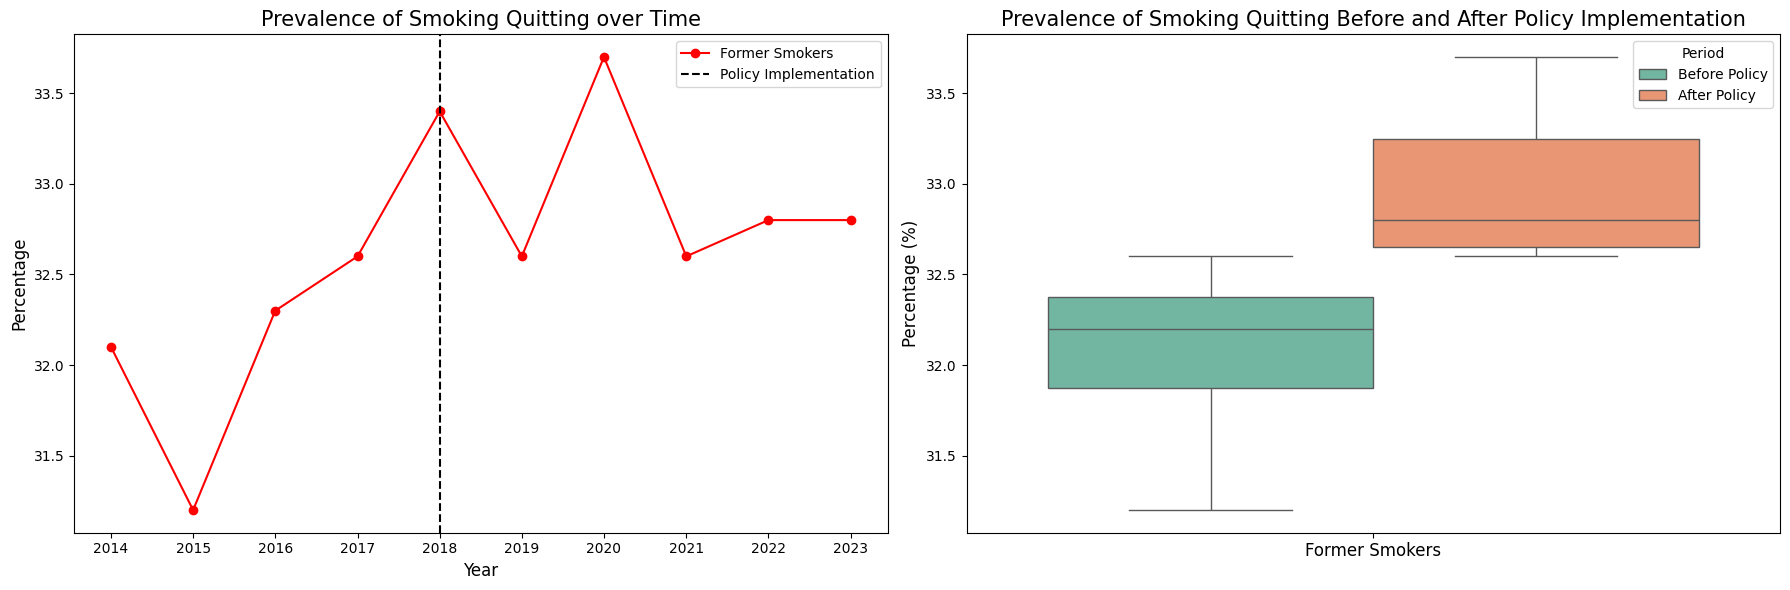

In [ ]:
# Create a visualisation for adult former smokers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Time series of prevalence of adult former smokers
axes[0].plot(df_18_plus['Year'], df_18_plus['FormerSmokers'], marker='o', label='Former Smokers', color='red')
axes[0].axvline(x=pd.Timestamp('2018-01-01'), color='black', linestyle='--', label='Policy Implementation') # Add a vertical line for policy implementation
axes[0].set_title('Prevalence of Smoking Quitting over Time', fontsize=15)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].legend()

# Before-after boxplot of adult former smokers
melted_adults = df_18_plus.melt(
    id_vars=['AgeGroup', 'Period'],
    value_vars=['DailySmokers', 'FormerSmokers'],
    var_name='Category',
    value_name='Percentage'
)
adult_former_smokers = melted_adults[melted_adults['Category'] == 'FormerSmokers']

sns.boxplot(x='Category', y='Percentage', hue='Period', data=adult_former_smokers, palette='Set2', ax=axes[1])
axes[1].set_title('Prevalence of Smoking Quitting Before and After Policy Implementation', fontsize=15)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('')  # Remove x-axis label
axes[1].set_xticks([0])
axes[1].set_xticklabels(['Former Smokers'], fontsize=12)


plt.tight_layout()
plt.show()

Visual exploration shows that the trend is quite irregular, however overall, it seems that the number of former smokers has increased since the implementation of policy. We perform statistical testing to check.

In [ ]:
# Display assumption test results for former smokers
assumptions_former = assumptions_df[assumptions_df['smokers_types'] == 'FormerSmokers']
print(assumptions_former)

   smokers_types  normality_before_p  normality_after_p  equal_var_p
3  FormerSmokers            0.477532           0.103954     0.746265


Data meets normality and equal variance assumptions. We use parametric testing.

In [ ]:
# Display parametric testing results for former smokers
results_daily = results_df[results_df['smokers_types'] == 'FormerSmokers']
print(results_daily)

   smokers_types  mean_before  mean_after  percent_change  t_statistic  \
3  FormerSmokers        32.05   32.983333        2.912116    -2.796725   

    p_value   cohen_d  
3  0.023315  1.743711  


## Data Analysis: 2. Changes in Smoking Behavior Among Younger Generations

Finally, we create visualisations and use statistical tests to examine if the number of teenage non-smokers (aged 12–17) increased since the policy's implementation.


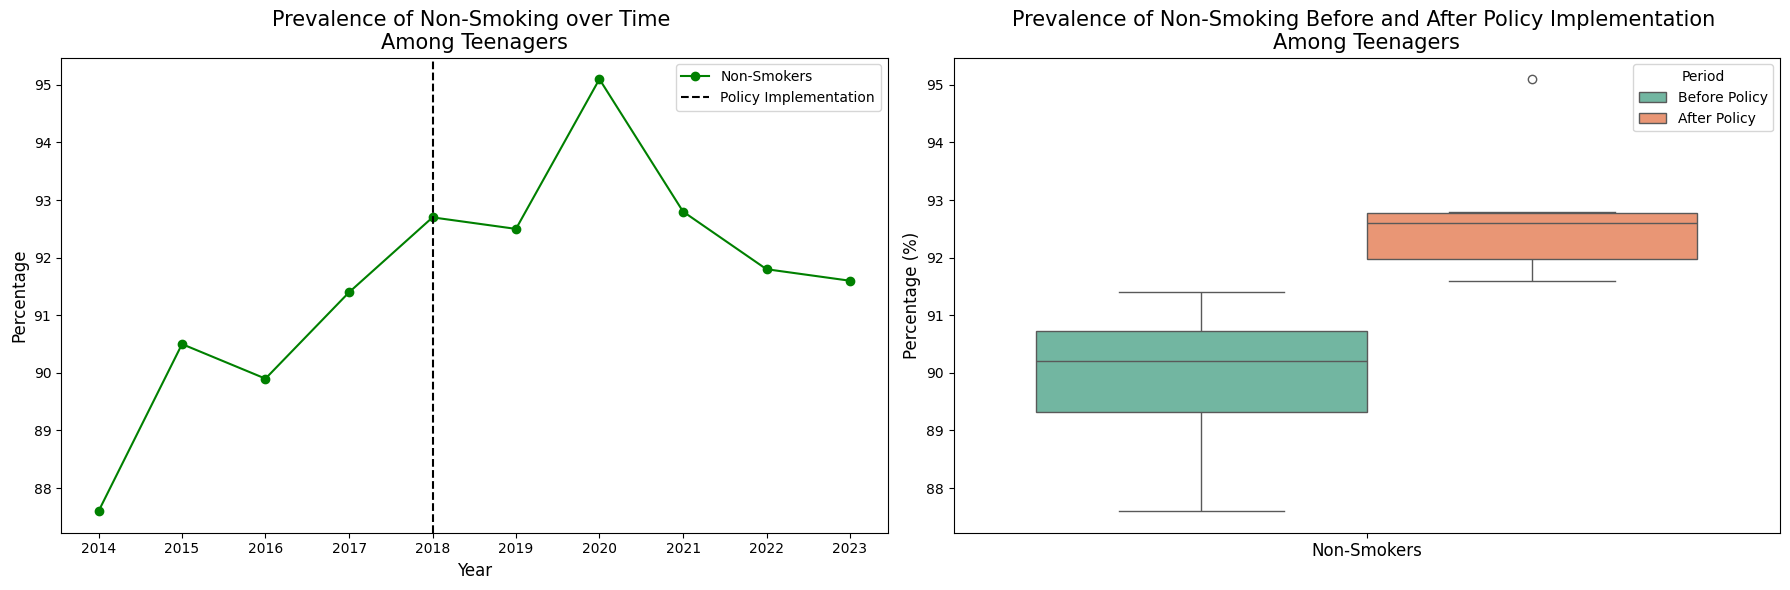

In [ ]:
# Create a visualisation for non-adult non-smokers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Time series of prevalence of non-adult non-smokers
axes[0].plot(df_12_17['Year'], df_12_17['NonSmokers'], marker='o', label='Non-Smokers', color='green')
axes[0].axvline(x=pd.Timestamp('2018-01-01'), color='black', linestyle='--', label='Policy Implementation') # Add a vertical line for policy implementation
axes[0].set_title('Prevalence of Non-Smoking over Time \nAmong Teenagers', fontsize=15)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].legend()

# Before-after boxplot of non-adult non-smokers
melted_teens = df_12_17.melt(
    id_vars=['AgeGroup', 'Period'],
    value_vars=['NonSmokers'],
    var_name='Category',
    value_name='Percentage'
)
teenage_non_smokers = melted_teens[melted_teens['Category'] == 'NonSmokers']

sns.boxplot(x='Category', y='Percentage', hue='Period', data=teenage_non_smokers, palette='Set2', ax=axes[1])
axes[1].set_title('Prevalence of Non-Smoking Before and After Policy Implementation \nAmong Teenagers', fontsize=15)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('')  # Remove x-axis label
axes[1].set_xticks([0])
axes[1].set_xticklabels(['Non-Smokers'], fontsize=12)


plt.tight_layout()
plt.show()

There is an outlier visible in the boxplot. Comparing this with the time series graph we can note that in 2020 the number of teenagers categorised as non-smokers is much higher than in other observed years. We speculate that this is likely due to the pandemic - young people stayed at home and perhaps did not have as many opportunities to smoke under the watcheful eye of their caregivers.

We need to consider that this outlier is likely going to skew the results of our analysis - to examine this we first run our analysis without dealing with this outlier. After we remove the point and run the tests again.

In [ ]:
assumptions_results_teens = [test_assumptions(df_12_17, smokers_types) for smokers_types in smokers]
assumptions_df_teens = pd.DataFrame(assumptions_results_teens)

# Display results for teenage non-smokers
assumptions_teens = assumptions_df_teens[assumptions_df_teens['smokers_types'] == 'NonSmokers']
print(assumptions_teens)

  smokers_types  normality_before_p  normality_after_p  equal_var_p
2    NonSmokers            0.604884           0.110132     0.632853


In [ ]:
results_teens = [analyze_policy_impact(df_12_17, smokers_types) for smokers_types in smokers]
results_df_teens = pd.DataFrame(results_teens)

# Display results for teenage non-smokers
results_teens = results_df_teens[results_df_teens['smokers_types'] == 'NonSmokers']
print(results_teens)

  smokers_types  mean_before  mean_after  percent_change  t_statistic  \
2    NonSmokers        89.85       92.75        3.227602    -3.206488   

   p_value  cohen_d  
2  0.01249  2.00286  


Now the analysis without the outlier point.

In [ ]:
# Deal with the outlier by removing all points outside of the interquantaile range
def remove_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]


print("Outlier Removal - IQR Method")

after_policy_df = df_12_17[df_12_17['Period'] == 'After Policy']
before_policy_df = df_12_17[df_12_17['Period'] == 'Before Policy']

before_count = len(df_12_17)
after_outliers = after_policy_df[after_policy_df['NonSmokers'].isin(remove_iqr_outliers(after_policy_df['NonSmokers']))]
df_12_17_outliers = pd.concat([before_policy_df, after_outliers])
after_count = len(df_12_17_outliers)

print(f"NonSmokers: Removed {before_count - after_count} rows")

Outlier Removal - IQR Method
NonSmokers: Removed 1 rows


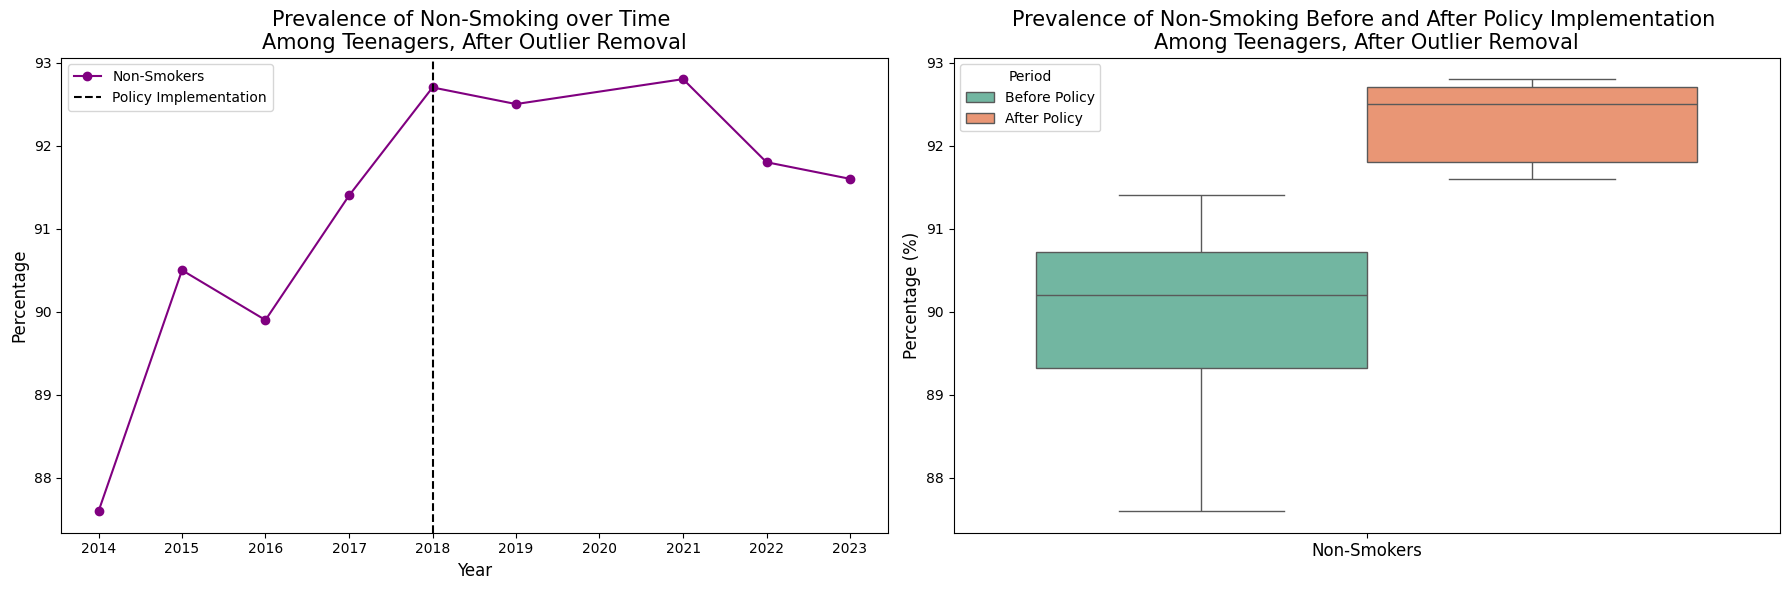

In [ ]:
# Create a visualisation for non-adult non-smokers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Time series of prevalence of non-adult non-smokers
axes[0].plot(df_12_17_outliers['Year'], df_12_17_outliers['NonSmokers'], marker='o', label='Non-Smokers', color='purple')
axes[0].axvline(x=pd.Timestamp('2018-01-01'), color='black', linestyle='--', label='Policy Implementation') # Add a vertical line for policy implementation
axes[0].set_title('Prevalence of Non-Smoking over Time \nAmong Teenagers, After Outlier Removal', fontsize=15)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].legend()

# Before-after boxplot of non-adult non-smokers
melted_teens_outliers = df_12_17_outliers.melt(
    id_vars=['AgeGroup', 'Period'],
    value_vars=['NonSmokers'],
    var_name='Category',
    value_name='Percentage'
)
teenage_non_smokers_outliers = melted_teens_outliers[melted_teens_outliers['Category'] == 'NonSmokers']

sns.boxplot(x='Category', y='Percentage', hue='Period', data=teenage_non_smokers_outliers, palette='Set2', ax=axes[1])
axes[1].set_title('Prevalence of Non-Smoking Before and After Policy Implementation \nAmong Teenagers, After Outlier Removal', fontsize=15)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xlabel('')  # Remove x-axis label
axes[1].set_xticks([0])
axes[1].set_xticklabels(['Non-Smokers'], fontsize=12)


plt.tight_layout()
plt.show()

We can see that the outlier was removed. We perform analysis again on the dataset without outliers.

In [ ]:
assumptions_results_teens_out = [test_assumptions(df_12_17_outliers, smokers_types) for smokers_types in smokers]
assumptions_df_teens_out = pd.DataFrame(assumptions_results_teens_out)

# Display results for teenage non-smokers
assumptions_teens_out = assumptions_df_teens_out[assumptions_df_teens_out['smokers_types'] == 'NonSmokers']
print(assumptions_teens_out)

  smokers_types  normality_before_p  normality_after_p  equal_var_p
2    NonSmokers            0.604884           0.253846     0.226323


In [ ]:
results_teens_out = [analyze_policy_impact(df_12_17_outliers, smokers_types) for smokers_types in smokers]
results_df_teens_out = pd.DataFrame(results_teens_out)

# Display results for teenage non-smokers
results_teens_out = results_df_teens_out[results_df_teens_out['smokers_types'] == 'NonSmokers']
print(results_teens_out)

  smokers_types  mean_before  mean_after  percent_change  t_statistic  \
2    NonSmokers        89.85       92.28        2.704508    -3.180929   

    p_value   cohen_d  
2  0.015471  2.008676  


## Bonus Analysis: ECigarettes

We visualise the time series trend of ECigarette smoking, in the over-18 and under-18 age groups.

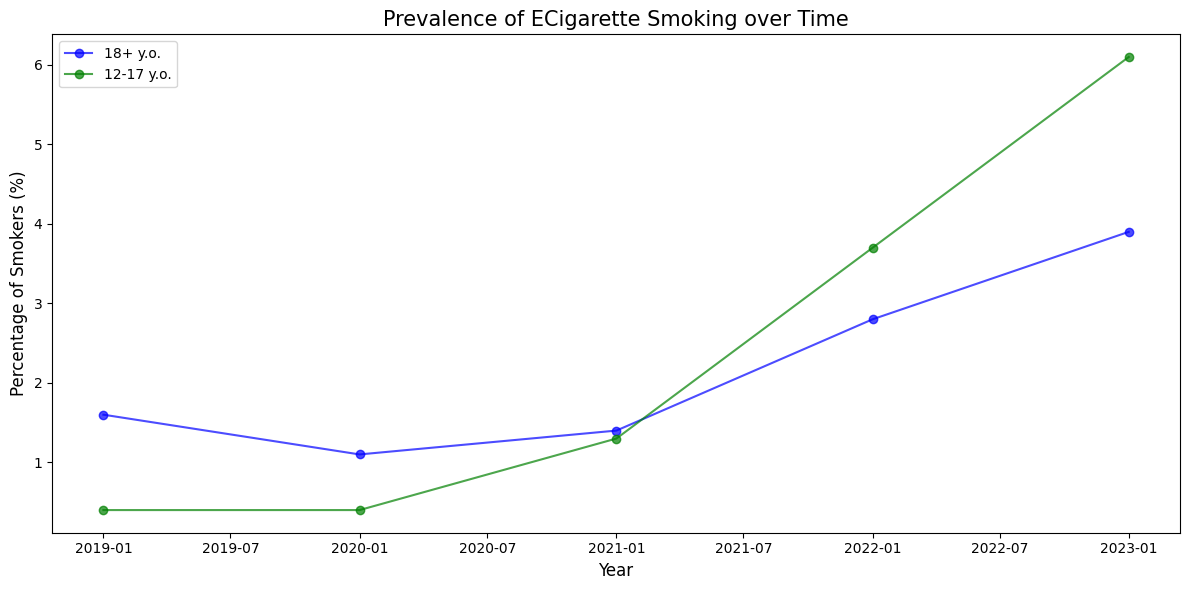

In [ ]:
# Create a visualisation for ECigarette smokers by Age

plt.figure(figsize=(12, 6))
plt.title('Prevalence of ECigarette Smoking over Time', fontsize=15)

plt.plot(df_18_plus['Year'], df_18_plus['ECigarette'], label='18+ y.o.', color='blue', alpha=0.7, marker='o')
plt.plot(df_12_17['Year'], df_12_17['ECigarette'], label='12-17 y.o.', color='green', alpha=0.7, marker='o')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Smokers (%)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()